## Python code for prediction the state of the drill 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

**Getting the data** importing from the file 

In [2]:
my_data = pd.read_csv("data_case_study.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,timestamp,engine_speed,hydraulic_drive_off,drill_boom_in_anchor_position,pvalve_drill_forward,hydraulic_pump,bolt,boom_lift,boom_lower,boom_forward,boom_backward,drill_boom_turn_left,drill_boom_turn_right,drill_boom_turn_forward,drill_boom_turn_backward,beam_right,beam_left,anchor,activity
0,0,1534192356,74.898806,0.0,0.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idle
1,1,1534192357,75.139756,0.0,0.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idle
2,2,1534192358,74.647495,0.0,0.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idle
3,3,1534192359,106.015541,0.0,0.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Traveling
4,4,1534192360,95.702048,0.0,0.479059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Traveling


<div id="size"> 
    <h3>Size of the data</h3> 
</div>

In [3]:
my_data.shape

(149795, 20)

array([[<AxesSubplot:title={'center':'pvalve_drill_forward'}>]],
      dtype=object)

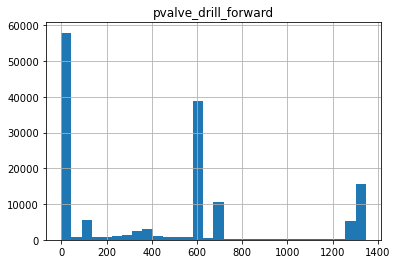

In [4]:
my_data.hist(column='pvalve_drill_forward',bins=30)

It looks like some column includes some values that are not numerical. We can fill those rows with the mean value of each column numerical value:

In [5]:
my_data = my_data.fillna(my_data.mean())

/var/folders/lv/dxj_bg0s52n3q6szkd623r6r0000gn/T/ipykernel_6743/3294854848.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  my_data = my_data.fillna(my_data.mean())


In [6]:
my_data.head()

,Unnamed: 0,timestamp,engine_speed,hydraulic_drive_off,drill_boom_in_anchor_position,pvalve_drill_forward,hydraulic_pump,bolt,boom_lift,boom_lower,boom_forward,boom_backward,drill_boom_turn_left,drill_boom_turn_right,drill_boom_turn_forward,drill_boom_turn_backward,beam_right,beam_left,anchor,activity
0,0,1534192356,74.898806,0.0,0.479059,437.72914,4821.15524,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476,Idle
1,1,1534192357,75.139756,0.0,0.479059,437.72914,4821.15524,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476,Idle
2,2,1534192358,74.647495,0.0,0.479059,437.72914,4821.15524,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476,Idle
3,3,1534192359,106.015541,0.0,0.479059,437.72914,4821.15524,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476,Traveling
4,4,1534192360,95.702048,0.0,0.479059,437.72914,4821.15524,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476,Traveling


In [7]:
my_data.describe()

,Unnamed: 0,timestamp,engine_speed,hydraulic_drive_off,drill_boom_in_anchor_position,pvalve_drill_forward,hydraulic_pump,bolt,boom_lift,boom_lower,boom_forward,boom_backward,drill_boom_turn_left,drill_boom_turn_right,drill_boom_turn_forward,drill_boom_turn_backward,beam_right,beam_left,anchor
count,149795.000000,1.497950e+05,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000,149795.000000
mean,74897.000000,1.534399e+09,34.089421,0.033535,0.202425,437.729140,4821.155240,0.152792,0.014413,0.002899,0.013216,0.798844,0.025193,0.014864,0.009514,0.003086,0.004615,0.005297,0.018476
std,43242.236124,1.086282e+05,70.143902,0.041140,0.235284,449.472674,3060.573194,0.433298,0.127474,0.020197,0.153457,1.203242,0.233093,0.074121,0.145598,0.035150,0.066341,0.086675,0.153390
min,0.000000,1.534192e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37448.500000,1.534247e+09,0.000000,0.000000,0.000000,0.000000,4821.155240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74897.000000,1.534435e+09,0.000000,0.000000,0.000000,437.729140,4821.155240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112345.500000,1.534485e+09,0.000000,0.083708,0.474718,616.661991,4821.155240,0.000000,0.000000,0.000000,0.000000,2.614998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,149794.000000,1.534624e+09,221.962122,0.086505,0.489539,1346.441069,49492.737540,1.425089,1.176320,0.147851,1.849182,2.700350,2.236793,0.400343,2.294875,0.416179,0.983027,1.460492,1.332156


Droping the first and timestamp column

In [8]:
my_data = my_data.drop(['Unnamed: 0','timestamp'], axis=1)

In [9]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149795 entries, 0 to 149794
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   engine_speed                   149795 non-null  float64
 1   hydraulic_drive_off            149795 non-null  float64
 2   drill_boom_in_anchor_position  149795 non-null  float64
 3   pvalve_drill_forward           149795 non-null  float64
 4   hydraulic_pump                 149795 non-null  float64
 5   bolt                           149795 non-null  float64
 6   boom_lift                      149795 non-null  float64
 7   boom_lower                     149795 non-null  float64
 8   boom_forward                   149795 non-null  float64
 9   boom_backward                  149795 non-null  float64
 10  drill_boom_turn_left           149795 non-null  float64
 11  drill_boom_turn_right          149795 non-null  float64
 12  drill_boom_turn_forward       

In [10]:
columns = ['engine_speed','hydraulic_drive_off','drill_boom_in_anchor_position','pvalve_drill_forward','hydraulic_pump','bolt','boom_lift','boom_lower','boom_forward','boom_backward','drill_boom_turn_left','drill_boom_turn_right','drill_boom_turn_forward','drill_boom_turn_backward','beam_right','beam_left','anchor']
X = my_data[columns].values
X[0:5]

array([[7.48988056e+01, 0.00000000e+00, 4.79058660e-01, 4.37729140e+02,
        4.82115524e+03, 1.52792389e-01, 1.44125913e-02, 2.89941629e-03,
        1.32158995e-02, 7.98844235e-01, 2.51931569e-02, 1.48642753e-02,
        9.51437752e-03, 3.08635919e-03, 4.61516617e-03, 5.29735030e-03,
        1.84760364e-02],
       [7.51397555e+01, 0.00000000e+00, 4.79058660e-01, 4.37729140e+02,
        4.82115524e+03, 1.52792389e-01, 1.44125913e-02, 2.89941629e-03,
        1.32158995e-02, 7.98844235e-01, 2.51931569e-02, 1.48642753e-02,
        9.51437752e-03, 3.08635919e-03, 4.61516617e-03, 5.29735030e-03,
        1.84760364e-02],
       [7.46474948e+01, 0.00000000e+00, 4.79058660e-01, 4.37729140e+02,
        4.82115524e+03, 1.52792389e-01, 1.44125913e-02, 2.89941629e-03,
        1.32158995e-02, 7.98844235e-01, 2.51931569e-02, 1.48642753e-02,
        9.51437752e-03, 3.08635919e-03, 4.61516617e-03, 5.29735030e-03,
        1.84760364e-02],
       [1.06015541e+02, 0.00000000e+00, 4.79058660e-01, 4.377

Now we can fill the target variable.

In [11]:
y = my_data["activity"].values
y[0:5]

array(['Idle', 'Idle', 'Idle', 'Traveling', 'Traveling'], dtype=object)

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Ensurig the dimensions match 

In [14]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape)),
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X training set (104856, 17) &  Size of Y training set (104856,)
Shape of X test set (44939, 17) &  Size of Y test set (44939,)


In [15]:
drillTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drillTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
drillTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [17]:
y_predTree = drillTree.predict(X_testset)

In [18]:
print (y_predTree [0:5])
print (y_testset [0:5])

['Idle' 'Machine Off' 'Drilling' 'Transitional Delay' 'Machine Off']
['Idle' 'Machine Off' 'Drilling' 'Transitional Delay' 'Machine Off']


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of the model.
</div>

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt

## Testing the prediction with the test set

In [20]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_predTree))

DecisionTrees's Accuracy:  0.9603684995215737


## Cross validation

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(drillTree, X, y, cv=5)

In [22]:
scores.mean(), scores.std()

(0.9596181447978903, 0.0041465955195247595)

<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>



In [23]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [24]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

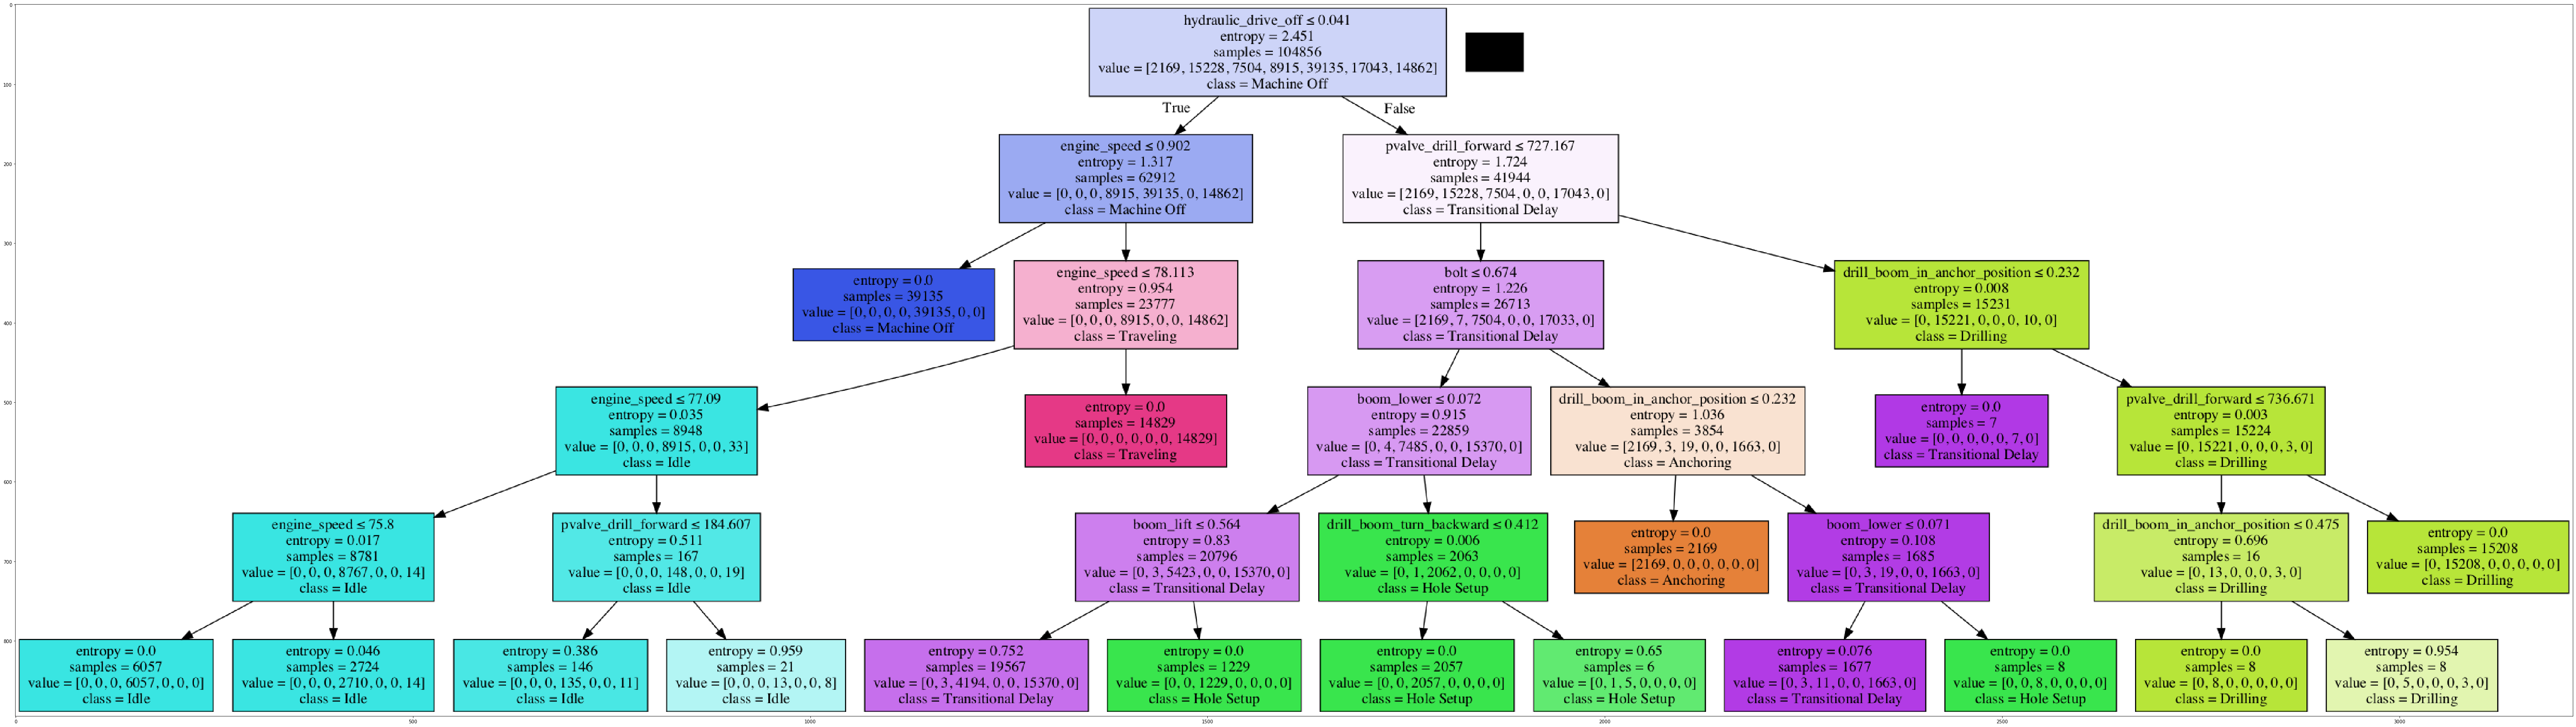

In [25]:
dot_data = StringIO()
filename = "drill_decision_tree.png"
# change columns to fit with the number of columns in the data frame
featureNames = my_data.columns[0:17]
out=tree.export_graphviz(drillTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')